In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_red = pd.read_csv("winequality-red.csv", encoding='latin-1', sep=";")
df_red_copy = df_red.copy()
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_white = pd.read_csv("winequality-white.csv", encoding='latin-1', sep=";")
df_white_copy = df_white.copy()
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


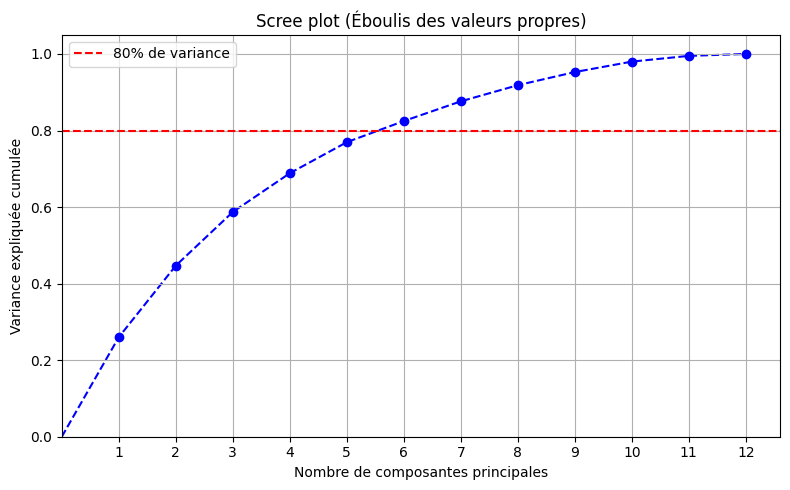

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- 1. Standardisation des données ---
X_scaled = StandardScaler().fit_transform(df_red) 

pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# --- Calcul de la variance expliquée cumulée ---
cumulative_variance = np.cumsum(explained_variance)

# Ajouter un point 0 au début pour que l'axe des X commence à 0
cumulative_variance = np.insert(cumulative_variance, 0, 0)

# --- Graphique ---
plt.figure(figsize=(8, 5))

# Tracer la ligne sans points
plt.plot(np.arange(0, len(cumulative_variance)), cumulative_variance, linestyle='--', color='b', zorder=1)

# Ajouter des points uniquement pour les composantes supérieures à 0 (points au-dessus de la ligne)
plt.scatter(np.arange(1, len(cumulative_variance)), cumulative_variance[1:], color='b', zorder=2)

# Changer les ticks pour commencer à 1 sur l'axe des X
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))

# Ajuster les limites de l'axe Y pour qu'il commence bien à 0
plt.ylim(bottom=0)

# Ajuster aussi l'axe X pour commencer à 0
plt.xlim(left=0)

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree plot (Éboulis des valeurs propres)')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# --- 1. Standardisation des données ---
X_scaled = StandardScaler().fit_transform(df_red)  # Remplace 'df_red' par ton DataFrame

# --- 2. Appliquer l'ACP avec 6 composantes principales ---
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# --- 3. Variance expliquée par chaque composante ---
print("📈 Variance expliquée par chaque composante :")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

# --- 5. Contributions des variables aux composantes (loadings) ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_red.columns  # Remplace 'df_red.columns' par le nom de tes variables
)

loadings


📈 Variance expliquée par chaque composante :
PC1: 0.260 (26.0%)
PC2: 0.187 (18.7%)
PC3: 0.140 (14.0%)
PC4: 0.101 (10.1%)
PC5: 0.081 (8.1%)
PC6: 0.055 (5.5%)


,PC1,PC2,PC3,PC4,PC5,PC6
fixed acidity,0.487883,0.004173,-0.164829,-0.231098,-0.078779,-0.055531
volatile acidity,-0.265129,-0.338968,-0.227089,0.041858,0.299379,-0.297287
citric acid,0.473335,0.137358,0.100229,-0.056736,-0.120149,-0.136633
residual sugar,0.139154,-0.167736,0.243620,-0.383038,0.709363,-0.109311
chlorides,0.197427,-0.189788,-0.026608,0.654778,0.266237,-0.337337
free sulfur dioxide,-0.045881,-0.259483,0.616111,-0.033711,-0.159413,0.042648
total sulfur dioxide,0.004067,-0.363971,0.540732,-0.028460,-0.218453,-0.115954
density,0.370301,-0.330781,-0.168723,-0.200693,0.208793,0.425667
pH,-0.432721,0.065440,0.069771,-0.005466,0.257647,0.480354
sulphates,0.254535,0.109334,0.212913,0.560502,0.214835,0.403743


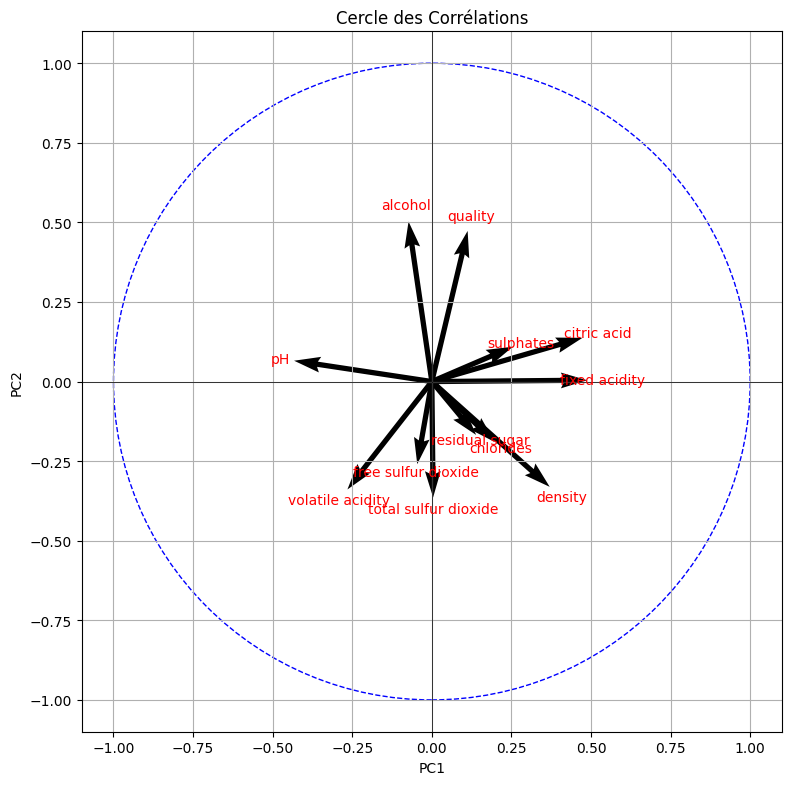

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Si tu as déjà un objet PCA de sklearn
# Refaire une ACP complète pour obtenir les loadings
pca_full = PCA().fit(X_scaled)
loadings = pca_full.components_.T  # Matrice des loadings (variables x composantes)

# --- Calcul de la variance expliquée cumulée ---
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# --- Graphique du cercle des corrélations ---
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Tracer le cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Tracer les vecteurs des variables
for i in range(loadings.shape[0]):
    plt.quiver(0, 0, loadings[i, 0], loadings[i, 1], angles='xy', scale_units='xy', scale=1)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, df_red.columns[i], color='red', ha='center', va='center')

# Limiter les axes pour afficher tout le cercle
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter des titres et labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des Corrélations')

# Afficher la grille
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Afficher le graphique
plt.tight_layout()
plt.show()
